# CNN for predicting hand written digits

In [1]:
import numpy as np
import tensorflow as tf

## Setting parameters for CNN

In [2]:
height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

In [3]:
pool3_fmaps = conv2_fmaps

n_fc1 = 64
n_outputs = 10

In [4]:
with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

In [5]:
with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 7 * 7])

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

In [6]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


## Training our model

In [7]:
n_epochs = 10
batch_size = 100

In [8]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "./my_mnist_model")


0 Train accuracy: 0.94 Test accuracy: 0.9807
1 Train accuracy: 1.0 Test accuracy: 0.9834
2 Train accuracy: 1.0 Test accuracy: 0.9874
3 Train accuracy: 1.0 Test accuracy: 0.9888
4 Train accuracy: 0.99 Test accuracy: 0.9892
5 Train accuracy: 1.0 Test accuracy: 0.9892
6 Train accuracy: 1.0 Test accuracy: 0.9893
7 Train accuracy: 1.0 Test accuracy: 0.988
8 Train accuracy: 1.0 Test accuracy: 0.9883
9 Train accuracy: 1.0 Test accuracy: 0.9878


## Our model is stored in "my_mnist_model.meta" file and can be restored to be used again

In [4]:
saver.restore(sess,"./my_mnist_model.meta")   # this line can be used in execution phase to restore model

## Some of the features learned

In [5]:
saver2 = tf.train.import_meta_graph("./my_mnist_model.meta")
graph = tf.get_default_graph().get_tensor_by_name("conv1/kernel/Adam:0")

In [7]:
graph.get_shape()

TensorShape([Dimension(3), Dimension(3), Dimension(1), Dimension(32)])

In [12]:
with tf.Session() as sess:
    saver2.restore(sess,tf.train.latest_checkpoint("./")) 
    features = sess.run(graph)

INFO:tensorflow:Restoring parameters from ./my_mnist_model


In [13]:
features[:,:,0,9]

array([[-0.00021292,  0.0001607 , -0.00031098],
       [-0.00014136, -0.00045807, -0.0004662 ],
       [-0.00037318, -0.00028529,  0.00015671]], dtype=float32)

In [14]:
features[:,:,0,8]

array([[-0.00299881, -0.00229127, -0.00068707],
       [-0.00275706, -0.00151994, -0.000358  ],
       [-0.00199205, -0.00075376, -0.00032902]], dtype=float32)

# Visualization on Tensorflow

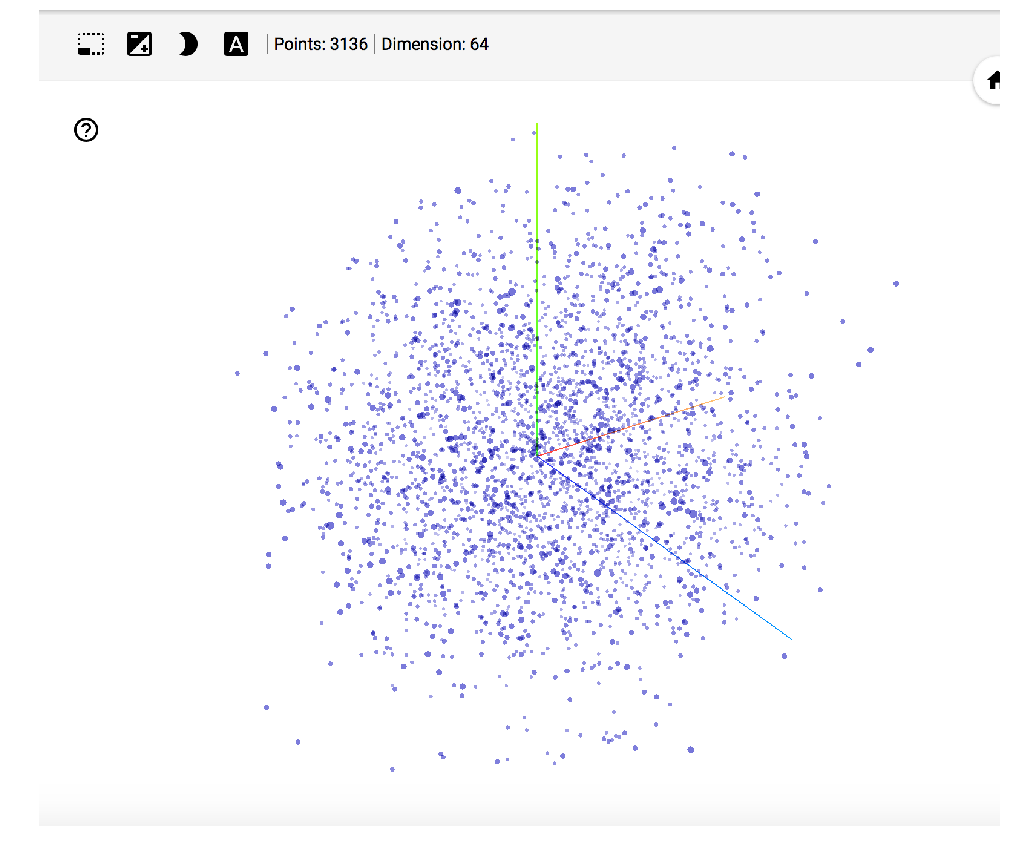

In [16]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import matplotlib.image as mpimg
plt.figure(figsize=(20,15))
img = mpimg.imread('/Users/user/Desktop/' +'features1.png')
plt.axis('off')
plt.imshow(img)
plt.show()

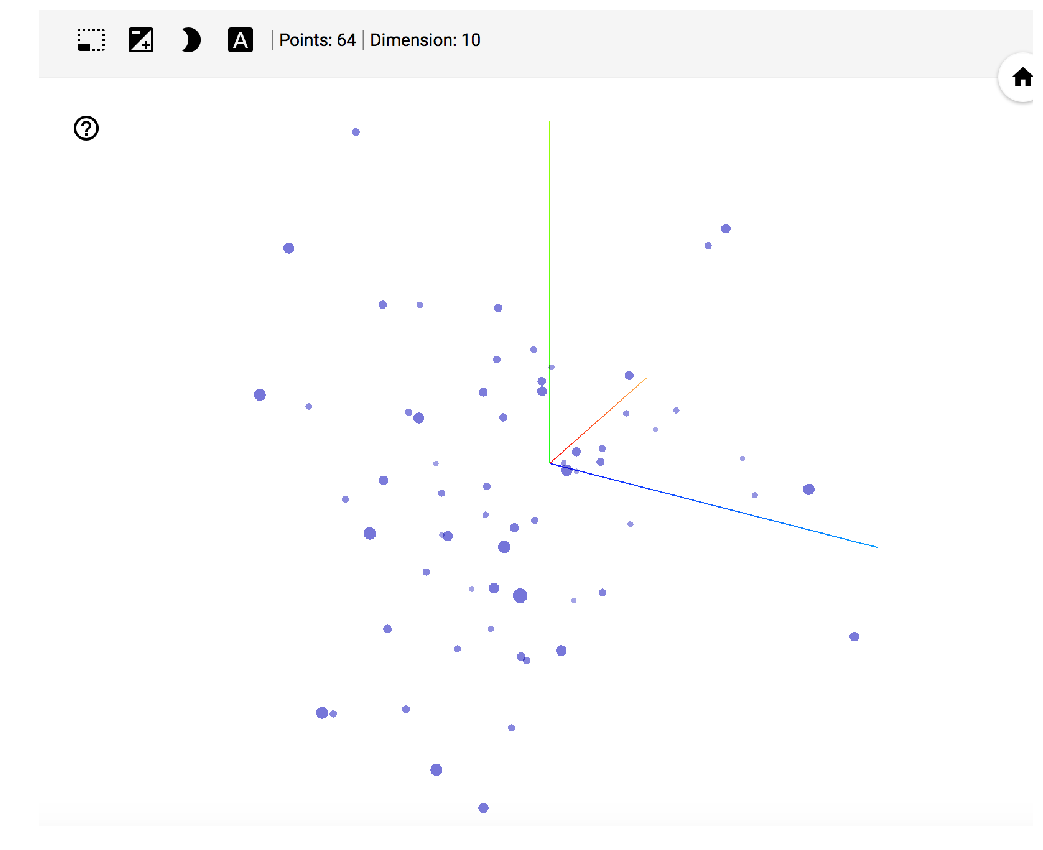

In [17]:
plt.figure(figsize=(20,15))
img = mpimg.imread('/Users/user/Desktop/' +'features2.png')
plt.axis('off')
plt.imshow(img)
plt.show()